<a href="https://colab.research.google.com/github/onuda22/skripsi-apple-diseases/blob/main/Visualisasi_Model_per_Skenario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Koneksikan colab dengan drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#khusus untuk optimizer Adabelief menggunakan ternsorflow-addons karena tensorflow tidak menyediakan optimizer tersebut
!pip install tensorflow-addons

In [ ]:
#Import library yang dibutuhkan
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tabulate import tabulate
import matplotlib.pyplot as plt

In [ ]:
#Inisialisasi optimizer Adabelief
AdaBelief = tfa.optimizers.AdaBelief()
tf.keras.utils.get_custom_objects()['AdaBeliefOptimizer'] = AdaBelief

In [ ]:
#Load Seluruh Model dari Pelatihan
#Dataset Plant Pathology
#Dengan parameter tuning sebagai berikut:
#Dense Layer : 128
#Dropout : 0,25
#Learning Rate : 0,0001 atau 1e-4
#Optimizer: Adam, RMSprop, SGD, Adadelta, Adamax, Adagrad, Adabelief, Nadam
dense = "128"
model = "Model.B6."
training = "training_log_B6_"
dropout1 = "0,25"
dropout2 = "025."
path  = "/content/drive/MyDrive/Coding/Skripsi/Model/Model_B_"+dropout1+"_"+dense+"/Model/"
path2 = "/content/drive/MyDrive/Coding/Skripsi/Model/Model_B_"+dropout1+"_"+dense+"/Training Log/"

combined_path1 = path+model+dropout2+dense
combined_path2 = path2+training+dropout1+"_"+dense
#Definisikan Path Model
Adabelief = combined_path1+"_Adabelief.hdf5"
Adadelta  = combined_path1+"_Adadelta.hdf5"
Adagrad   = combined_path1+"_Adagrad.hdf5"
Adam      = combined_path1+"_Adam.hdf5"
Adamax    = combined_path1+"_Adamax.hdf5"
Nadam     = combined_path1+"_Nadam.hdf5"
RMSprop   = combined_path1+"_RMSprop.hdf5"
SGD       = combined_path1+"_SGD.hdf5"

#Definisikan Path training Log
Adabelief_train = combined_path2+"_Adabelief.csv"
Adadelta_train  = combined_path2+"_Adadelta.csv"
Adagrad_train   = combined_path2+"_Adagrad.csv"
Adam_train      = combined_path2+"_Adam.csv"
Adamax_train    = combined_path2+"_Adamax.csv"
Nadam_train     = combined_path2+"_Nadam.csv"
RMSprop_train   = combined_path2+"_RMSprop.csv"
SGD_train       = combined_path2+"_SGD.csv"


In [ ]:
#Load Model

#Adam
Model_adam = load_model(Adam)
#RMSprop
Model_rmsprop = load_model(RMSprop)
#SGD
Model_sgd = load_model(SGD)
#Nadam
Model_nadam = load_model(Nadam)
#Adadelta
Model_adadelta = load_model(Adadelta)
#Adagrad
Model_adagrad = load_model(Adagrad)
#Adamax
Model_adamax = load_model(Adamax)
#Adabelief
Model_adabelief = load_model(Adabelief)

In [ ]:
adam = pd.read_csv(Adam_train)
rmsprop = pd.read_csv(RMSprop_train)
sgd = pd.read_csv(SGD_train)
nadam = pd.read_csv(Nadam_train)
adadelta = pd.read_csv(Adadelta_train)
adagrad = pd.read_csv(Adagrad_train)
adamax = pd.read_csv(Adamax_train)
adabelief = pd.read_csv(Adabelief_train)

In [ ]:
rmsprop.head()

,epoch,accuracy,auc,loss,val_accuracy,val_auc,val_loss
0,0,0.343750,0.527753,1.325087,0.518519,0.700465,0.978621
1,1,0.468750,0.658780,1.075611,0.641975,0.809785,0.828863
2,2,0.532986,0.728750,0.956096,0.740741,0.876886,0.706142
3,3,0.598958,0.785467,0.866856,0.814815,0.920096,0.595540
4,4,0.657986,0.821276,0.795200,0.827160,0.941853,0.526239


In [ ]:
# List nilai akurasi pelatihan dan validasi untuk masing-masing model
train_accuracies = [adam['accuracy'], rmsprop['accuracy'], sgd['accuracy'], nadam['accuracy'],
                    adadelta['accuracy'], adagrad['accuracy'], adamax['accuracy'], adabelief['accuracy']]
val_accuracies = [adam['val_accuracy'], rmsprop['val_accuracy'], sgd['val_accuracy'], nadam['val_accuracy'],
                    adadelta['val_accuracy'], adagrad['val_accuracy'], adamax['val_accuracy'], adabelief['val_accuracy']]
model_titles = ['Adam', 'RMSprop', 'SGD', 'Nadam', 'Adadelta', 'Adagrad', 'Adamax', 'Adabelief']

# Mengatur ukuran gambar dan subplot
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

# Meloopi setiap model dan menggambar grafiknya pada subplot yang sesuai
for i, ax in enumerate(axs.flatten()):
    ax.plot(train_accuracies[i], label='Train Accuracy')
    ax.plot(val_accuracies[i], label='Validation Accuracy')
    ax.set_title(model_titles[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

# Memberikan judul pada gambar
fig.suptitle('Training and Validation Accuracy')
# Menyesuaikan tata letak dan tampilan gambar
plt.tight_layout()
plt.show()


In [ ]:
# List nilai loss pelatihan dan validasi untuk masing-masing model
train_loss = [adam['loss'], rmsprop['loss'], sgd['loss'], nadam['loss'],
                    adadelta['loss'], adagrad['loss'], adamax['loss'], adabelief['loss']]
val_loss = [adam['val_loss'], rmsprop['val_loss'], sgd['val_loss'], nadam['val_loss'],
                    adadelta['val_loss'], adagrad['val_loss'], adamax['val_loss'], adabelief['val_loss']]
model_titles = ['Adam', 'RMSprop', 'SGD', 'Nadam', 'Adadelta', 'Adagrad', 'Adamax', 'Adabelief']

# Mengatur ukuran gambar dan subplot
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

# Melooping setiap model dan menggambar grafiknya pada subplot yang sesuai
for i, ax in enumerate(axs.flatten()):
    ax.plot(train_loss[i], label='Train Loss')
    ax.plot(val_loss[i], label='Validation Loss')
    ax.set_title(model_titles[i])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

# Memberikan judul pada gambar
fig.suptitle('Training and Validation Loss')
# Menyesuaikan tata letak dan tampilan gambar
plt.tight_layout()
plt.show()


In [ ]:
#Program berikut adalah untuk menampilkan val_accuracy tertinggi yang disimpan oleh model,
#- pada epoch ke berapa val_accuracy tersebut tercapai
#- berapa besar ukuran model yang dihasilkan
#- menampilkan nilai-nilai lainnya pada saat model tersimpan pada val_accuracy terkait

#definisikan array untuk menampung nilai yang nantinya akan diubah menjadi tabel
table_data = []

model_files = [Adam, RMSprop, SGD, Nadam,
               Adadelta, Adagrad, Adamax, Adabelief]
#model_files = [Model_adam, Model_rmsprop, Model_sgd, Model_nadam, Model_adadelta,
               #Model_adagrad, Model_adamax, Model_adabelief]

j = ['Adam', 'RMSprop', 'SGD', 'Nadam', 'Adadelta', 'Adagrad', 'Adamax', 'Adabelief']

for i, model_accuracies in enumerate(val_accuracies, start=1):

    model_size = os.path.getsize(model_files[i - 1])

    def get_formatted_size(size_in_bytes):
        sizes = ["B", "KB", "MB", "GB", "TB"]
        i = 0
        while size_in_bytes >= 1024 and i < len(sizes) - 1:
            size_in_bytes /= 1024
            i += 1
        return f"{size_in_bytes:.2f} {sizes[i]}"

    # Mencari nilai akurasi terbesar dan epoch terkait untuk model ke-i
    max_accuracy = np.max(model_accuracies)
    max_accuracy_epoch = np.argmax(model_accuracies) + 1

    # Mendapatkan loss terkait dengan nilai akurasi terbesar
    max_accuracy_loss = val_loss[i - 1][max_accuracy_epoch - 1]

    # Menambahkan informasi model ke tabel
    table_data.append([j[i-1], max_accuracy, max_accuracy_epoch, max_accuracy_loss, get_formatted_size(model_size)])


# Membuat header tabel
headers = ["Model", "Akurasi Terbesar", "Epoch Terkait", "Loss Terkait", "Ukuran Model"]

# Mencetak tabel
print(tabulate(table_data, headers=headers, tablefmt="grid"))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Mendefinisikan path ke direktori gambar pengujian
test_dir = "/content/drive/MyDrive/Coding/Skripsi/Dataset/skenario_data_B/test"

# Membuat objek ImageDataGenerator untuk normalisasi data
test_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator data pengujian
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Ukuran gambar target
    class_mode='categorical',  # Mode kelas berdasarkan direktori
    shuffle=False  # Jangan mengacak urutan data
)

6/6 [==============================] - 43s 8s/step
Nilai AUC untuk Adam: 0.9960671768707483
6/6 [==============================] - 17s 3s/step
Nilai AUC untuk RMSprop: 0.9929846938775512
6/6 [==============================] - 14s 2s/step
Nilai AUC untuk SGD: 0.8594281462585034
6/6 [==============================] - 15s 2s/step
Nilai AUC untuk Nadam: 0.9908588435374149
6/6 [==============================] - 15s 2s/step
Nilai AUC untuk Adadelta: 0.4271364795918367
6/6 [==============================] - 17s 3s/step
Nilai AUC untuk Adagrad: 0.894876700680272
6/6 [==============================] - 15s 2s/step
Nilai AUC untuk Adamax: 0.9715136054421768
6/6 [==============================] - 14s 2s/step
Nilai AUC untuk Adabelief: 0.9910714285714285


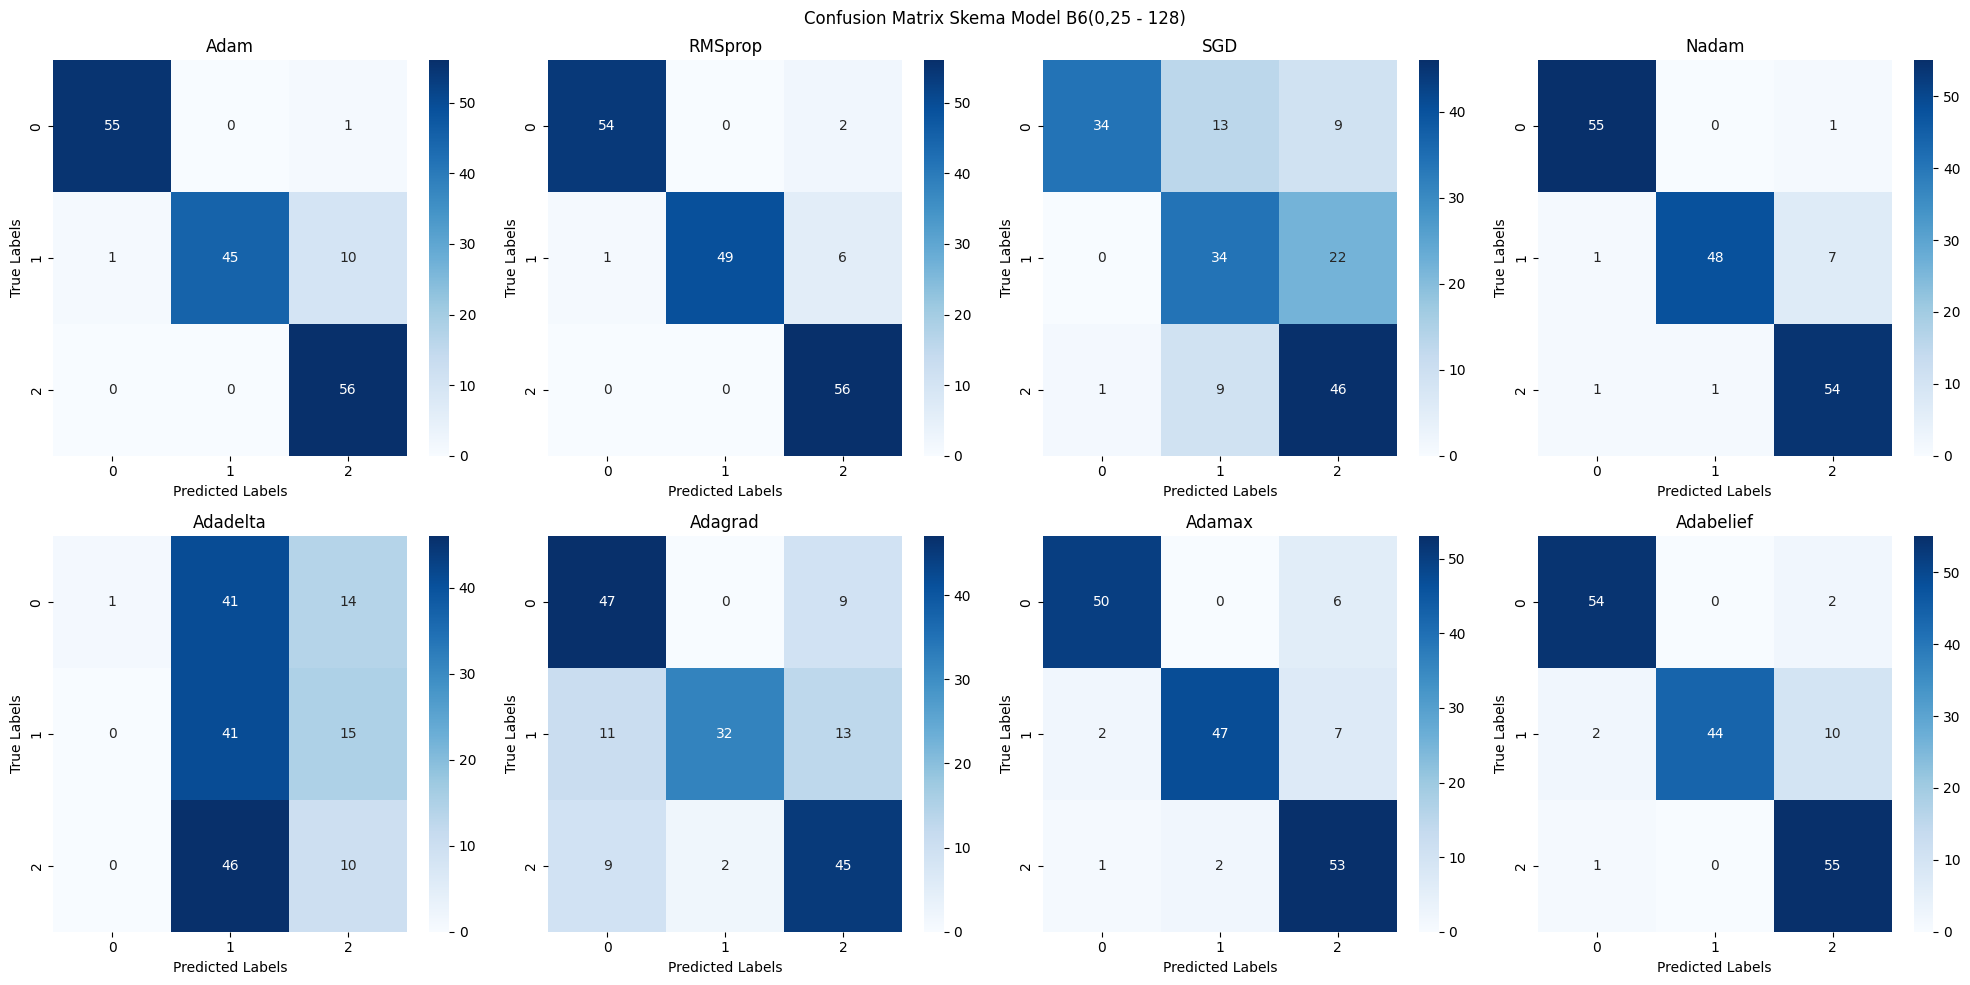

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score

# List model dan judul untuk masing-masing model
models = [Model_adam, Model_rmsprop, Model_sgd, Model_nadam, Model_adadelta,
               Model_adagrad, Model_adamax, Model_adabelief]
model_titles = ['Adam', 'RMSprop', 'SGD', 'Nadam', 'Adadelta', 'Adagrad', 'Adamax', 'Adabelief']

# Membuat frame gambar dengan subplot untuk setiap model
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Confusion Matrix Skema Model B6(0,25 - 128)')

# Loop untuk setiap model
for i, (model, title) in enumerate(zip(models, model_titles)):
    # Mendapatkan prediksi kelas dari model untuk data pengujian
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Mendapatkan label yang sebenarnya untuk data pengujian
    y_true = test_generator.classes

    # Menghitung matriks kebingungan
    cm = confusion_matrix(y_true, y_pred_classes)
    auc_score = roc_auc_score(y_true, y_pred, multi_class='ovr')

    # Menggambar heatmap dari matriks kebingungan di subplot yang sesuai
    ax = axes[i // 4, i % 4]
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    print(f"Nilai AUC untuk {title}: {auc_score}")

# Menyesuaikan tata letak subplot
plt.tight_layout()

# Menampilkan gambar
plt.show()
